<a href="https://colab.research.google.com/github/GabeMaldonado/JupyterNotebooks/blob/master/HoltWinters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##  Implementing Holt Winters Method using Statsmodels

In [0]:
import numpy as np
import pandas as pd
%matplotlib inline

In [0]:
# read in the data
df = pd.read_csv('airline_passengers.csv', index_col = 'Month', parse_dates = True)

In [0]:
df = df.dropna()

To use the Holt Winters method, it is crucial to understand what is the frequency of the data (daily, monthly, yearly). If we run df.index we see that the frequency = None so we have to implicitly define the frequency so statsmodel can work with this data. 

In [4]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [0]:
# define the frequency -- 'MS'for Monthly Start
df.index.freq = 'MS'

In [6]:
# call index to see frequency
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

In [7]:
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


Let's perform Simple Exponential Smoothing

In [0]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [0]:
span = 12
alpha = 2 / (span+1)

In [0]:
# let's code it with pandas first
df['EWMA12'] = df['Thousands of Passengers'].ewm(alpha = alpha, adjust = False).mean()

In [11]:
df.head()

,Thousands of Passengers,EWMA12
Month,,
1949-01-01,112,112.000000
1949-02-01,118,112.923077
1949-03-01,132,115.857988
1949-04-01,129,117.879836
1949-05-01,121,118.359861


In [0]:
# let's do it using statsmodels
model = SimpleExpSmoothing(df['Thousands of Passengers'])

In [0]:
fitted_model = model.fit(smoothing_level = alpha, optimized = False)

In [14]:
# call fittedvalues on fitted_model
fitted_model.fittedvalues

Month
1949-01-01    112.000000
1949-02-01    112.000000
1949-03-01    112.923077
1949-04-01    115.857988
1949-05-01    117.879836
1949-06-01    118.359861
1949-07-01    120.919883
1949-08-01    125.086055
1949-09-01    128.611277
1949-10-01    129.748004
1949-11-01    128.094465
1949-12-01    124.387624
1950-01-01    123.404912
1950-02-01    122.111849
1950-03-01    122.710026
1950-04-01    125.523868
1950-05-01    126.981735
1950-06-01    126.676852
1950-07-01    130.111183
1950-08-01    136.247924
1950-09-01    141.440551
1950-10-01    143.988159
1950-11-01    142.297673
1950-12-01    137.944185
1951-01-01    138.260464
1951-02-01    139.297316
1951-03-01    140.943882
1951-04-01    146.644824
1951-05-01    149.161005
1951-06-01    152.674696
                 ...    
1958-07-01    366.828136
1958-08-01    385.931500
1958-09-01    404.249730
1958-10-01    404.211310
1958-11-01    397.255724
1958-12-01    383.831767
1959-01-01    376.626879
1959-02-01    374.068898
1959-03-01    369.1

In [0]:
# shift the values by 1 and assign them to a new column in the df.

df['SES12'] = fitted_model.fittedvalues.shift(-1)

In [16]:
df.head()

,Thousands of Passengers,EWMA12,SES12
Month,,,
1949-01-01,112,112.000000,112.000000
1949-02-01,118,112.923077,112.923077
1949-03-01,132,115.857988,115.857988
1949-04-01,129,117.879836,117.879836
1949-05-01,121,118.359861,118.359861


We can see that the SimpleExponentialSmoothing returns exactly the same values as the EWM.

## Performing double and triple exponential smoothing, Holt Winters.

In [0]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

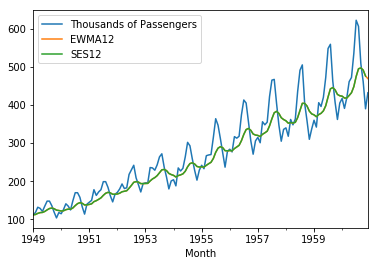

In [18]:
# plot the df
df.plot();

In [0]:
# create a new column Double Exponential Smoothing Additive Model 12 months or 'DES_add_12'

#df['DES_add_12'] = ExponentialSmoothing(df['Thousands of Passengers'], trend = 'add').fit().fittedvalues.shift(-1)

In [0]:
#df['TES_mul_12'] = ExponentialSmoothing(df['Thousands of Passengers'],trend='mul', seasonal='mul', seasonal_periods=12).fit().fittedvalues

##Working with the Energy Production Dataset

In [25]:
# read in data set
df_e = pd.read_csv('EnergyProduction.csv', index_col = 0, parse_dates = True)
df_e.head()

,EnergyIndex
DATE,
1970-01-01,43.0869
1970-02-01,42.5577
1970-03-01,41.6215
1970-04-01,40.1982
1970-05-01,39.9321


In [27]:
df_e.index

DatetimeIndex(['1970-01-01', '1970-02-01', '1970-03-01', '1970-04-01',
               '1970-05-01', '1970-06-01', '1970-07-01', '1970-08-01',
               '1970-09-01', '1970-10-01',
               ...
               '1989-03-01', '1989-04-01', '1989-05-01', '1989-06-01',
               '1989-07-01', '1989-08-01', '1989-09-01', '1989-10-01',
               '1989-11-01', '1989-12-01'],
              dtype='datetime64[ns]', name='DATE', length=240, freq=None)

In [28]:
# assign a frequency of 'MS' to the DatetimeIndex
df_e.index.freq = 'MS'
df_e.index

DatetimeIndex(['1970-01-01', '1970-02-01', '1970-03-01', '1970-04-01',
               '1970-05-01', '1970-06-01', '1970-07-01', '1970-08-01',
               '1970-09-01', '1970-10-01',
               ...
               '1989-03-01', '1989-04-01', '1989-05-01', '1989-06-01',
               '1989-07-01', '1989-08-01', '1989-09-01', '1989-10-01',
               '1989-11-01', '1989-12-01'],
              dtype='datetime64[ns]', name='DATE', length=240, freq='MS')

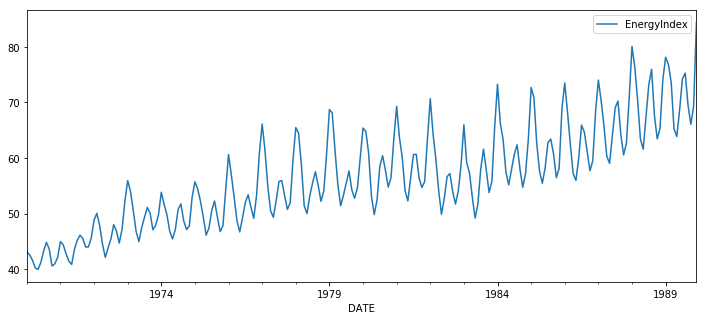

In [31]:
# plot the df
df_e.plot(figsize = (12,5));

In [0]:
# add a column that shows a 12 month SMA
df_e['SMA-12'] = df_e['EnergyIndex'].rolling(window = 12).mean()

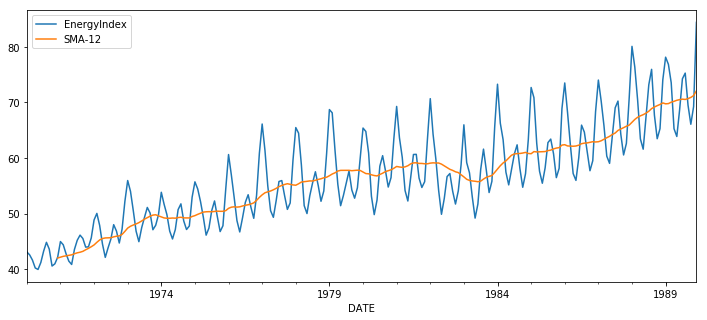

In [35]:
df_e.plot(figsize = (12,5))

In [0]:
# add a column that shows the EWMA with a span of 12
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

df_e['SES12'] = SimpleExpSmoothing(df_e['EnergyIndex']).fit(smoothing_level = 2 / (12+1), optimized = False).fittedvalues.shift(-1)

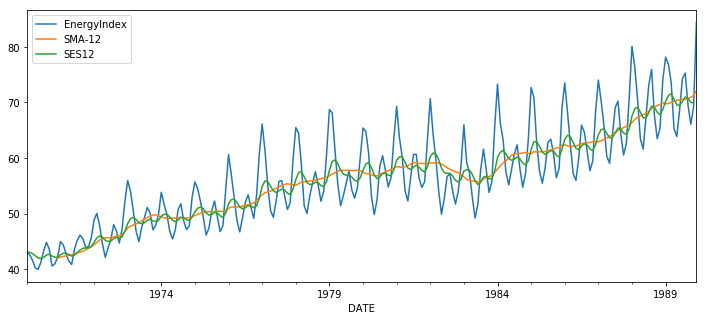

In [38]:
# plot the df_e
df_e.plot(figsize = (12,5))

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


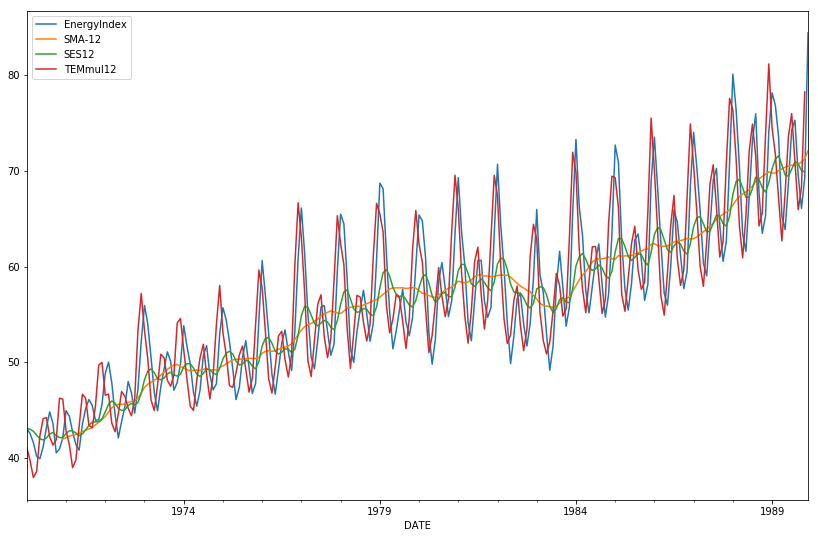

In [41]:
# Add a column that shows the Holt-Winters fitted modelusing Triple Exponential Smoothing 
# with multiplicative models.

from statsmodels.tsa.holtwinters import ExponentialSmoothing

df_e['TEMmul12'] = ExponentialSmoothing(df_e['EnergyIndex'], trend = 'mul', seasonal = 'mul', seasonal_periods = 12).fit().fittedvalues.shift(-1)
df_e.plot(figsize = (14,9))

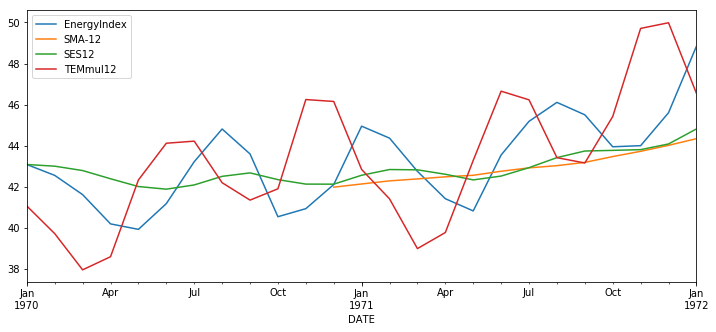

In [43]:
# Plot only the first two years
df_e[:'1972-01-01'].plot(figsize = (12,5))